# **Task 04:**
- Task: Sales Prediction using Python
- Role: Data Science @CodSoft
- Author: by Rohan Waghmare
- Batch No.: A71

# Sales Prediction Project

#### 1. Sales Prediction (Simple Linear Regression)
- Build a model to predict sales based on marketing expenditure across different platforms.
- Use the advertising dataset from ISLR to analyze the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

#### 2. Data Inspection
- Inspect the data to understand its structure, types of variables, and overall content.

#### 3. Data Cleaning
- Clean the data by handling missing values, removing duplicates, and ensuring consistency for analysis.

#### 4. Exploratory Data Analysis (EDA)
- Perform an initial analysis of individual variables to understand their distributions and basic statistics.

#### 5. Model Building
- Performing Simple Linear Regression: Develop a simple linear regression model to predict sales using the selected predictor variable.

#### 6. Model Evaluation
- Residual Analysis: Analyze residuals to validate the assumptions of the linear regression model.
- Distribution of the Error Terms: Check if the error terms are normally distributed by plotting a histogram.

#### 7. Different Types of Visualization

## 1. *Sales Prediction (Simple Linear Regression)*:
- You'll start by defining the problem.
- You need to build a model that predicts sales based on how much money is spent on advertising across different platforms.
- The dataset used will focus on the relationship between TV ads and sales.

### Reading & Understanding Data
- Before diving into the data, let's suppress any warnings to keep our output clean and easy to follow.
- Then, we'll import the necessary libraries for data manipulation and visualization.

In [19]:
# Suppress Warnings to avoid unnecessary output in the notebook
import warnings
warnings.filterwarnings('ignore')

# Import the numpy package for numerical operations and handling arrays
import numpy as np

# Import the pandas package for data manipulation and analysis
import pandas as pd

# Import matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import seaborn for making statistical plots with an attractive and informative design
import seaborn as sns

In [27]:
# Read the advertising dataset from a CSV file and load it into a DataFrame
ad = pd.DataFrame(pd.read_csv(r"C:\Users\Rohan\Desktop\DS Intern @CodSoft\Project Tasks\T4 - Sales Prediction Using Python\advertising.csv"))
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [29]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2. *Data Inspection*: 
- Here, you'll take a good look at the data.
- You'll understand what kind of information you have, like what the variables are and how the data is structured.

In [33]:
# Get the number of rows and columns in the DataFrame
ad.shape

(200, 4)

In [35]:
# Get a summary of the DataFrame, including the data types, non-null values, and memory usage
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [37]:
# Generate descriptive statistics for the DataFrame
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## 3. *Data Cleaning*: 
- Before doing any analysis, you'll clean the data.
- This means fixing any mistakes, handling missing information, and making sure the data is ready for analysis.

In [42]:
# Calculate the percentage of null values for each column in the DataFrame
null_percentage = ad.isnull().sum() * 100 / ad.shape[0]

# Display the percentage of null values for each column
null_percentage

# Since the null_percentage is zero for all columns, it indicates there are no NULL values in the dataset.
# Thus, the dataset is clean and ready for further analysis.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

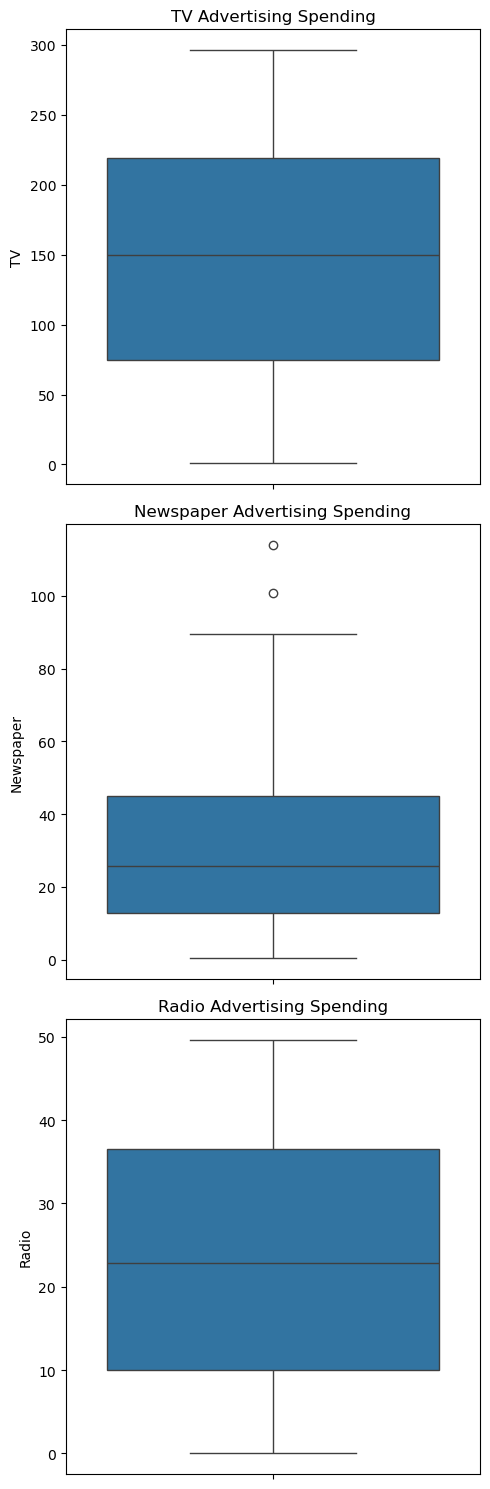

In [44]:
# Create a figure with 3 subplots arranged vertically
fig, axs = plt.subplots(3, figsize=(5, 15))

# Create a box plot for the 'TV' advertising spending column
plt1 = sns.boxplot(ad['TV'], ax=axs[0])
axs[0].set_title('TV Advertising Spending')

# Create a box plot for the 'Newspaper' advertising spending column
plt2 = sns.boxplot(ad['Newspaper'], ax=axs[1])
axs[1].set_title('Newspaper Advertising Spending')

# Create a box plot for the 'Radio' advertising spending column
plt3 = sns.boxplot(ad['Radio'], ax=axs[2])
axs[2].set_title('Radio Advertising Spending')

# Adjust layout to prevent overlap of subplots and labels
plt.tight_layout()

## 4. *Exploratory Data Analysis (EDA)*: 
- This step involves analyzing each variable on its own to see its characteristics.
- You'll look at things like how the data is distributed and its basic statistics.

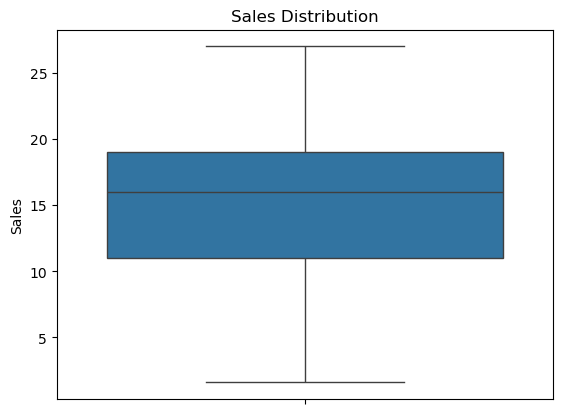

In [47]:
# Create a box plot for the 'Sales' column to visualize outliers
sns.boxplot(ad['Sales'])
plt.title('Sales Distribution')
plt.show()

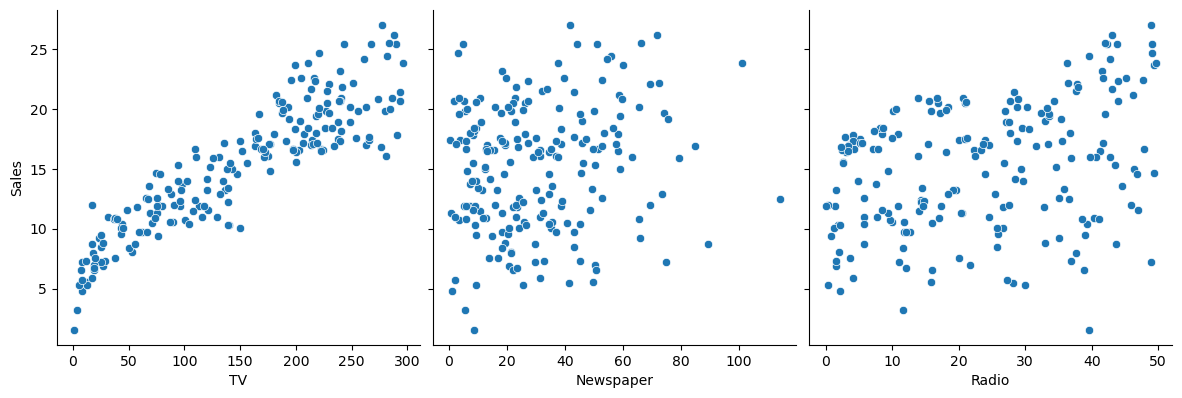

In [49]:
# Create scatter plots to examine the relationship between 'Sales' and advertising spending on 'TV', 'Newspaper', and 'Radio'
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')

# Display the scatter plots
plt.show()

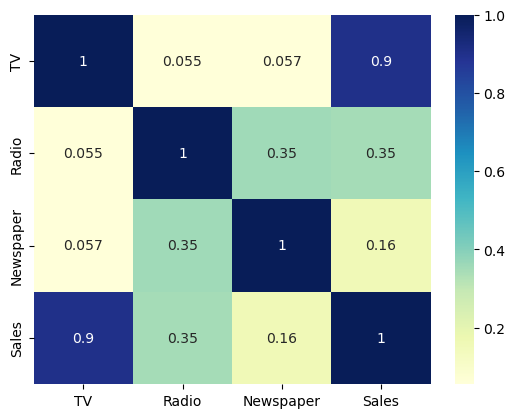

In [51]:
# Create a heatmap to visualize the correlation matrix between different variables in the dataset
sns.heatmap(ad.corr(), cmap="YlGnBu", annot=True)

# Display the heatmap
plt.show()

## 5. *Model Building*: 
- Now, you'll build your simple linear regression model.
- This model will help you predict sales using the variable you've selected from the data.

### Performing Simple Linear Regression

#### Equation of Linear Regression

The equation for a linear regression model is:

\[ y = c + m_1x_1 + m_2x_2 + ... + m_nx_n \]

- \( y \) is the response variable.
- \( c \) is the intercept.
- \( m_1, m_2, ..., m_n \) are the coefficients for the features \( x_1, x_2, ..., x_n \).

In our case, the equation simplifies to:

\[ y = c + m \times \text{TV} \]

Where:
- \( y \) is the Sales.
- \( \text{TV} \) is the feature variable.

The values \( m \) are called model coefficients# or parameters.

### Generic Steps in Model Building Using Statsmodels

1. **Assign Feature and Response Variables**:
   - Assign the feature variable (TV) to `X`.
   - Assign the responseay the summary of the model
model.summary()


In [69]:
# Assign feature variable TV to X
X = ad['TV']

# Assign response variable Sales to y
y = ad['Sales']

In [71]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # Features and target variable to split
    train_size=0.7,       # 70% of the data will be used for training
    test_size=0.3,        # 30% of the data will be used for testing
    random_state=100      # Seed for random number generator for reproducibility
)

In [73]:
# Display the first few rows of the training feature dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [75]:
# Display the first few rows of the training target variable dataset
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [77]:
# Import the statsmodels library for performing linear regression
import statsmodels.api as sm

In [79]:
# Add a constant to the feature dataset to include an intercept in the model
X_train_sm = sm.add_constant(X_train)

# Fit the regression model using Ordinary Least Squares (OLS)
lr = sm.OLS(y_train, X_train_sm).fit()

In [81]:
# Print the parameters of the fitted regression model, including the intercept and slope(s)
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [83]:
# Perform a summary operation to list out all the different parameters of the fitted regression line
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.52e-52
Time:                        01:28:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### Understanding Key Statistics from the Summary

The values we are concerned with are:

1. **The coefficients and significance (p-values)**
2. **R-squared**
3. **F statistic and its significance**

##### a. Coefficient for TV
- **Value**: 0.054
- **p-value**: Very low
- The coefficient is statistically significant, indicating that the association between TV and Sales is not purely by chance.

##### b. R-squared
- **Value**: 0.816
- This means that 81.6% of the variance in Sales is explained by TV.
- This is a decent R-squared value, suggesting a good model fit.

##### c. F statistic
- **p-value**: Very low (practically)
- This indicates that the model fit is statistically significant and that the explained variance is not purely by chance.

##### Model Fit and Equation:
- The fit of the model is significant. The linear regression equation based on the parameters is:



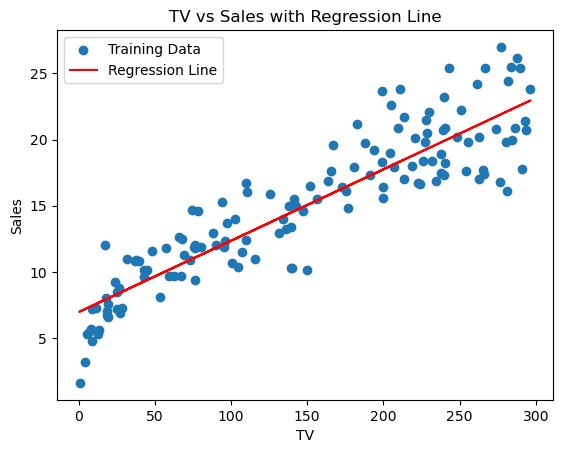

In [86]:
# Scatter plot of the training data
plt.scatter(X_train, y_train, label='Training Data')

# Plot the regression line
plt.plot(X_train, 6.948 + 0.054 * X_train, 'r', label='Regression Line')

# Add labels and a legend
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales with Regression Line')
plt.legend()

# Display the plot
plt.show()

### 6. *Model Evaluation*: 
- Finally, you'll check how good your model is.
- You'll do this by analyzing the residuals (the differences between predicted and actual values) to make sure the model is reliable.
- Also, you'll see if the errors are normally distributed, which is important for your model’s validity.
- To assess the quality of your model, you need to analyze the residuals (the differences between predicted and actual values).
- This helps ensure that the model is reliable and that the errors are normally distributed, which is crucial for the validity of the model.

**Residual Analysis**:
- Residual analysis is performed to validate the assumptions of the model and hence assess its reliability for inference.
- Evaluates the residuals to ensure the model's assumptions are valid and that the model is reliable.

**Distribution of the Error Terms**:
- One of the major assumptions of linear regression is that the error terms are normally distributed.
- To check this, plot the histogram of the error terms and examine its distribution.
- Assesses if the error terms follow a normal distribution, which is a key assumption in linear regression.
- The histogram helps visualize this distribution.

In [92]:
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

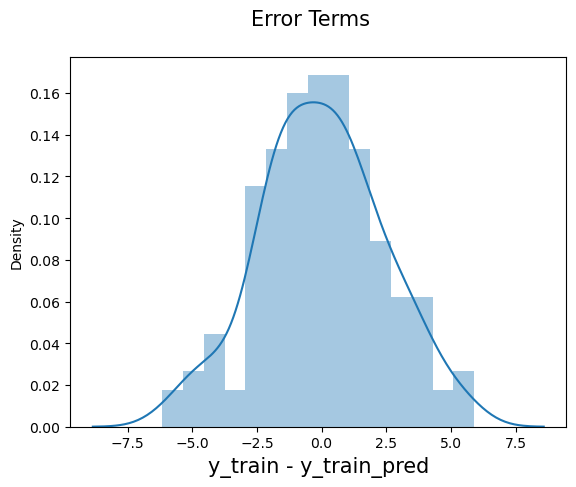

In [98]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

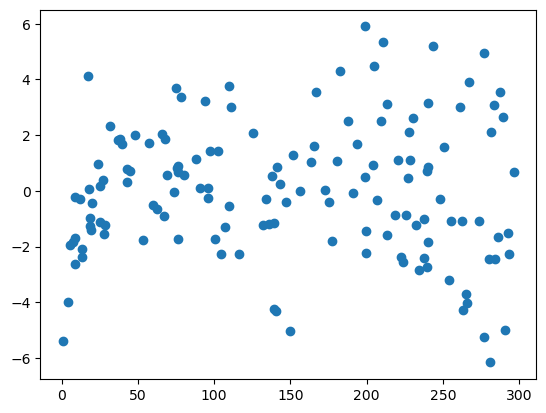

In [100]:
# Create a scatter plot of residuals against the independent variable
# X_train: Independent variable values
# res: Residuals (differences between actual and predicted values)
plt.scatter(X_train, res)

# Display the plot
plt.show()

#### Predictions on the Test Set

Now that you have fitted a regression line on your training dataset, it's time to make some predictions on the test data. a

1. **Add a Constant to the Test Data**

   Just like you did for the training data, add a constant to the `X_test` dbta.

2. **Make Predictions**

   Use the `predict` method of the fitted regression model to predict the `y` values corresponding to `X_test`.


In [103]:
# Add a constant to X_test to include the intercept term in the model
X_test_sm = sm.add_constant(X_test)

# Predict the y values for X_test_sm using the fitted regression model
y_pred = lr.predict(X_test_sm)

In [105]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [107]:
# Import mean_squared_error function from sklearn.metrics to calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Import r2_score function from sklearn.metrics to calculate the R-squared value
from sklearn.metrics import r2_score

In [109]:
# Calculate the Mean Squared Error (MSE) between the actual and predicted values
# Take the square root of the MSE to get the Root Mean Squared Error (RMSE)
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [111]:
# Calculate the R-squared value to evaluate the goodness of fit of the model
r_squared = r2_score(y_test, y_pred)

# Display the R-squared value
r_squared

0.7921031601245658

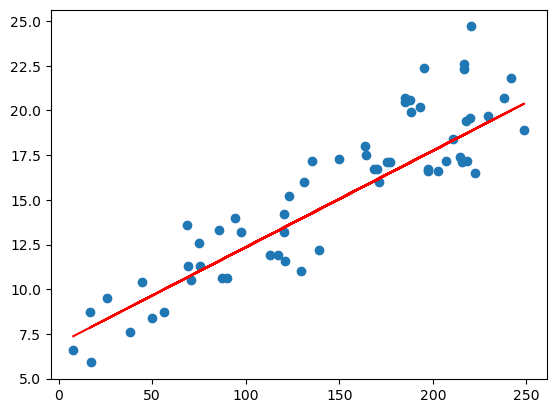

In [113]:
# Create a scatter plot of the actual test data
plt.scatter(X_test, y_test)

# Plot the regression line based on the fitted model
# Use the same regression equation: Sales = 6.948 + 0.054 * TV
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')

# Display the plot
plt.show()

### 7. *Different Types of Visualization*

##### 1] Residuals vs Fitted Values Plot:
- This plot helps visualize if there is any pattern in the residuals.
- Ideally, residuals should be randomly scattered around zero, indicating that the model has captured the relationship between variables well.
- This plot shows the residuals (errors) on the y-axis and the fitted values (predictions) on the x-axis.
- It helps to check if there are any patterns that the model hasn't captured.

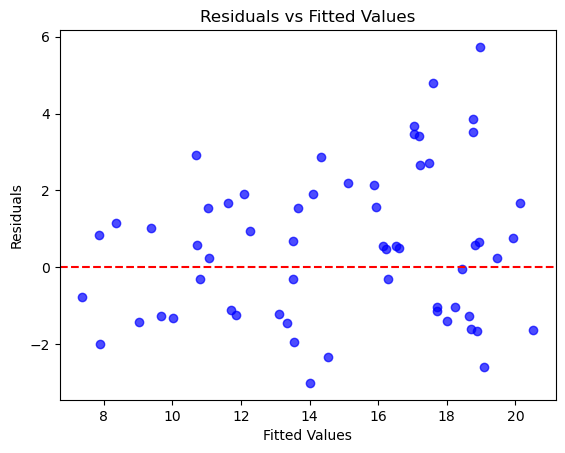

In [119]:
# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of residuals vs. fitted values
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')

# Add a horizontal line at zero
plt.axhline(y=0, color='red', linestyle='--')

# Set labels and title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.show()

##### 2] Q-Q Plot:
- A Q-Q (Quantile-Quantile) plot helps check if the residuals are normally distributed.
- It compares the quantiles of the residuals with the quantiles of a normal distribution.
- This plot compares the quantiles of the residuals with the quantiles of a normal distribution to check if the residuals are normally distributed.

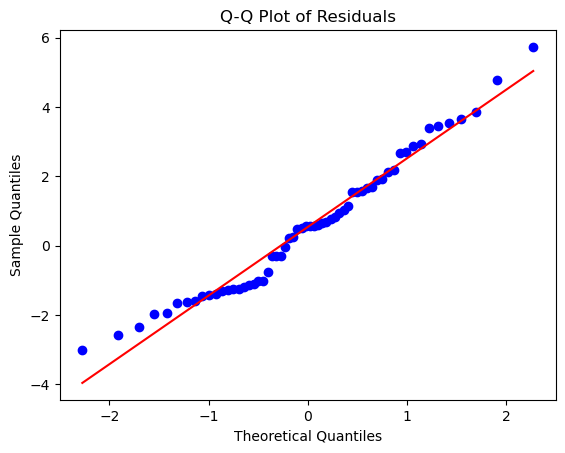

In [124]:
import scipy.stats as stats

# Q-Q plot to check for normality of residuals
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax)

# Set labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')

plt.show()

##### 3] Prediction vs Actual Values Plot:
- This plot compares the predicted values to the actual values.
- It helps to see how well the model’s predictions match the actual data.
- This plot displays the predicted values versus the actual values, and includes a 45-degree line to indicate perfect predictions.

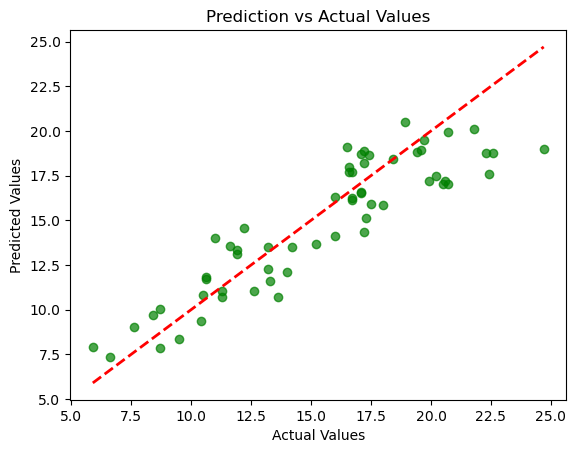

In [127]:
# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7, color='green')

# Add a 45-degree line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual Values')

plt.show()

### Summary of Sales Prediction Project - Task 4
In this task, we have focused on evaluating and visualizing the performance of our sales prediction model. Here's a summary of the key steps and analyses covered:

*Model Fitting and Prediction:*
We fitted a linear regression model to our training data and used it to make predictions on the test set. The model was evaluated using various metrics to assess its performance.

*Evaluation Metrics:*

1] Root Mean Squared Error (RMSE): We calculated the RMSE to measure the average magnitude of the prediction errors. This is useful for understanding the model’s accuracy in terms of the units of the response variable.
2] R-squared: We computed the R-squared value to determine the proportion of the variance in the dependent variable that is predictable from the independent variable. This metric indicates how well the model explains the variability in the data.

*Visualization:*

1] Residuals vs Fitted Values Plot: This scatter plot helped us analyze the residuals (errors) to check for any patterns. Ideally, the residuals should be randomly scattered around zero, indicating that the model has captured the relationship well.
2] Q-Q Plot: We used a Q-Q plot to assess if the residuals are normally distributed. This is a key assumption in linear regression and helps validate the reliability of the model’s predictions.
3] Prediction vs Actual Values Plot: This plot compared the predicted values to the actual values, helping us visualize the accuracy of the model. Points close to the 45-degree line indicate better prediction accuracy.

*Results:*

1] Coefficient and Significance: The coefficient for TV in the regression model was found to be 0.054 with a very low p-value, indicating a statistically significant relationship.
2] R-squared Value: The model explained 81.6% of the variance in sales, which is a strong result.
3] F-statistic: The model fit was statistically significant, with a very low p-value, confirming that the relationship between the variables is not purely by chance.

#### I am pleased to announce that I have successfully completed Task No. 4 as assigned by CodSoft for the Data Science domain project.
Thank you for visiting! #rohanwaghmare